## Regression - Supervised Learning - Denetimli öğretim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install xlrd


In [3]:
#dikkat et dosya excel dosyası olduğu için excel yazdık
df=pd.read_excel("cars.xls")

## EDA - Exploratory Data Analysis

In [4]:
df.isnull().sum()  #tüm veriler dolu

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.head() #ilk beş satır kaydı

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.tail() # son beş

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [7]:
#toplamda kaç farklı marka araba var 
df["Make"].unique() #tekil veriler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [8]:
df["Make"].nunique()

6

In [9]:
df.info() #sütunların isimleri, veri tipleri, dolu kayıt sayısı ve satır,sütun sayısı

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [10]:
#kaç satır, sütun var görmek için
df.shape
#fonksiyonlarda () açılır, özelik gösterirken açılmaz

(804, 12)

In [11]:
df.describe() #sütunların istatistik bilgilerini getirir

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [12]:
df.corr() #sütunların birbirine ne kadar bağlı olduğunu gösterir

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
#abs mutlak değerini alarak negatifleride pozitife çevirerek açık net bağıntılar oluşturuyor
#price'ı büyükten küçüğe sıralamış oluyor
#ascending=False büyükten küçüğe doğru sıralar, eğer ascending yazmazsan küçükten büyüğe olur
abs(df.corr()["Price"]).sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [15]:
#df["Mileage"].sort_values(ascending=False) # büyükten küçüğe sıralama örneği

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

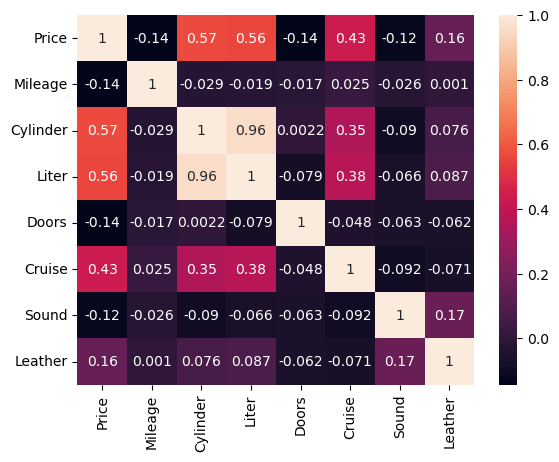

In [17]:
#ax=plt.subplots(figsize=(14,12)) #sütunun bütüklüğü için
sns.heatmap(df.corr(), annot=True)


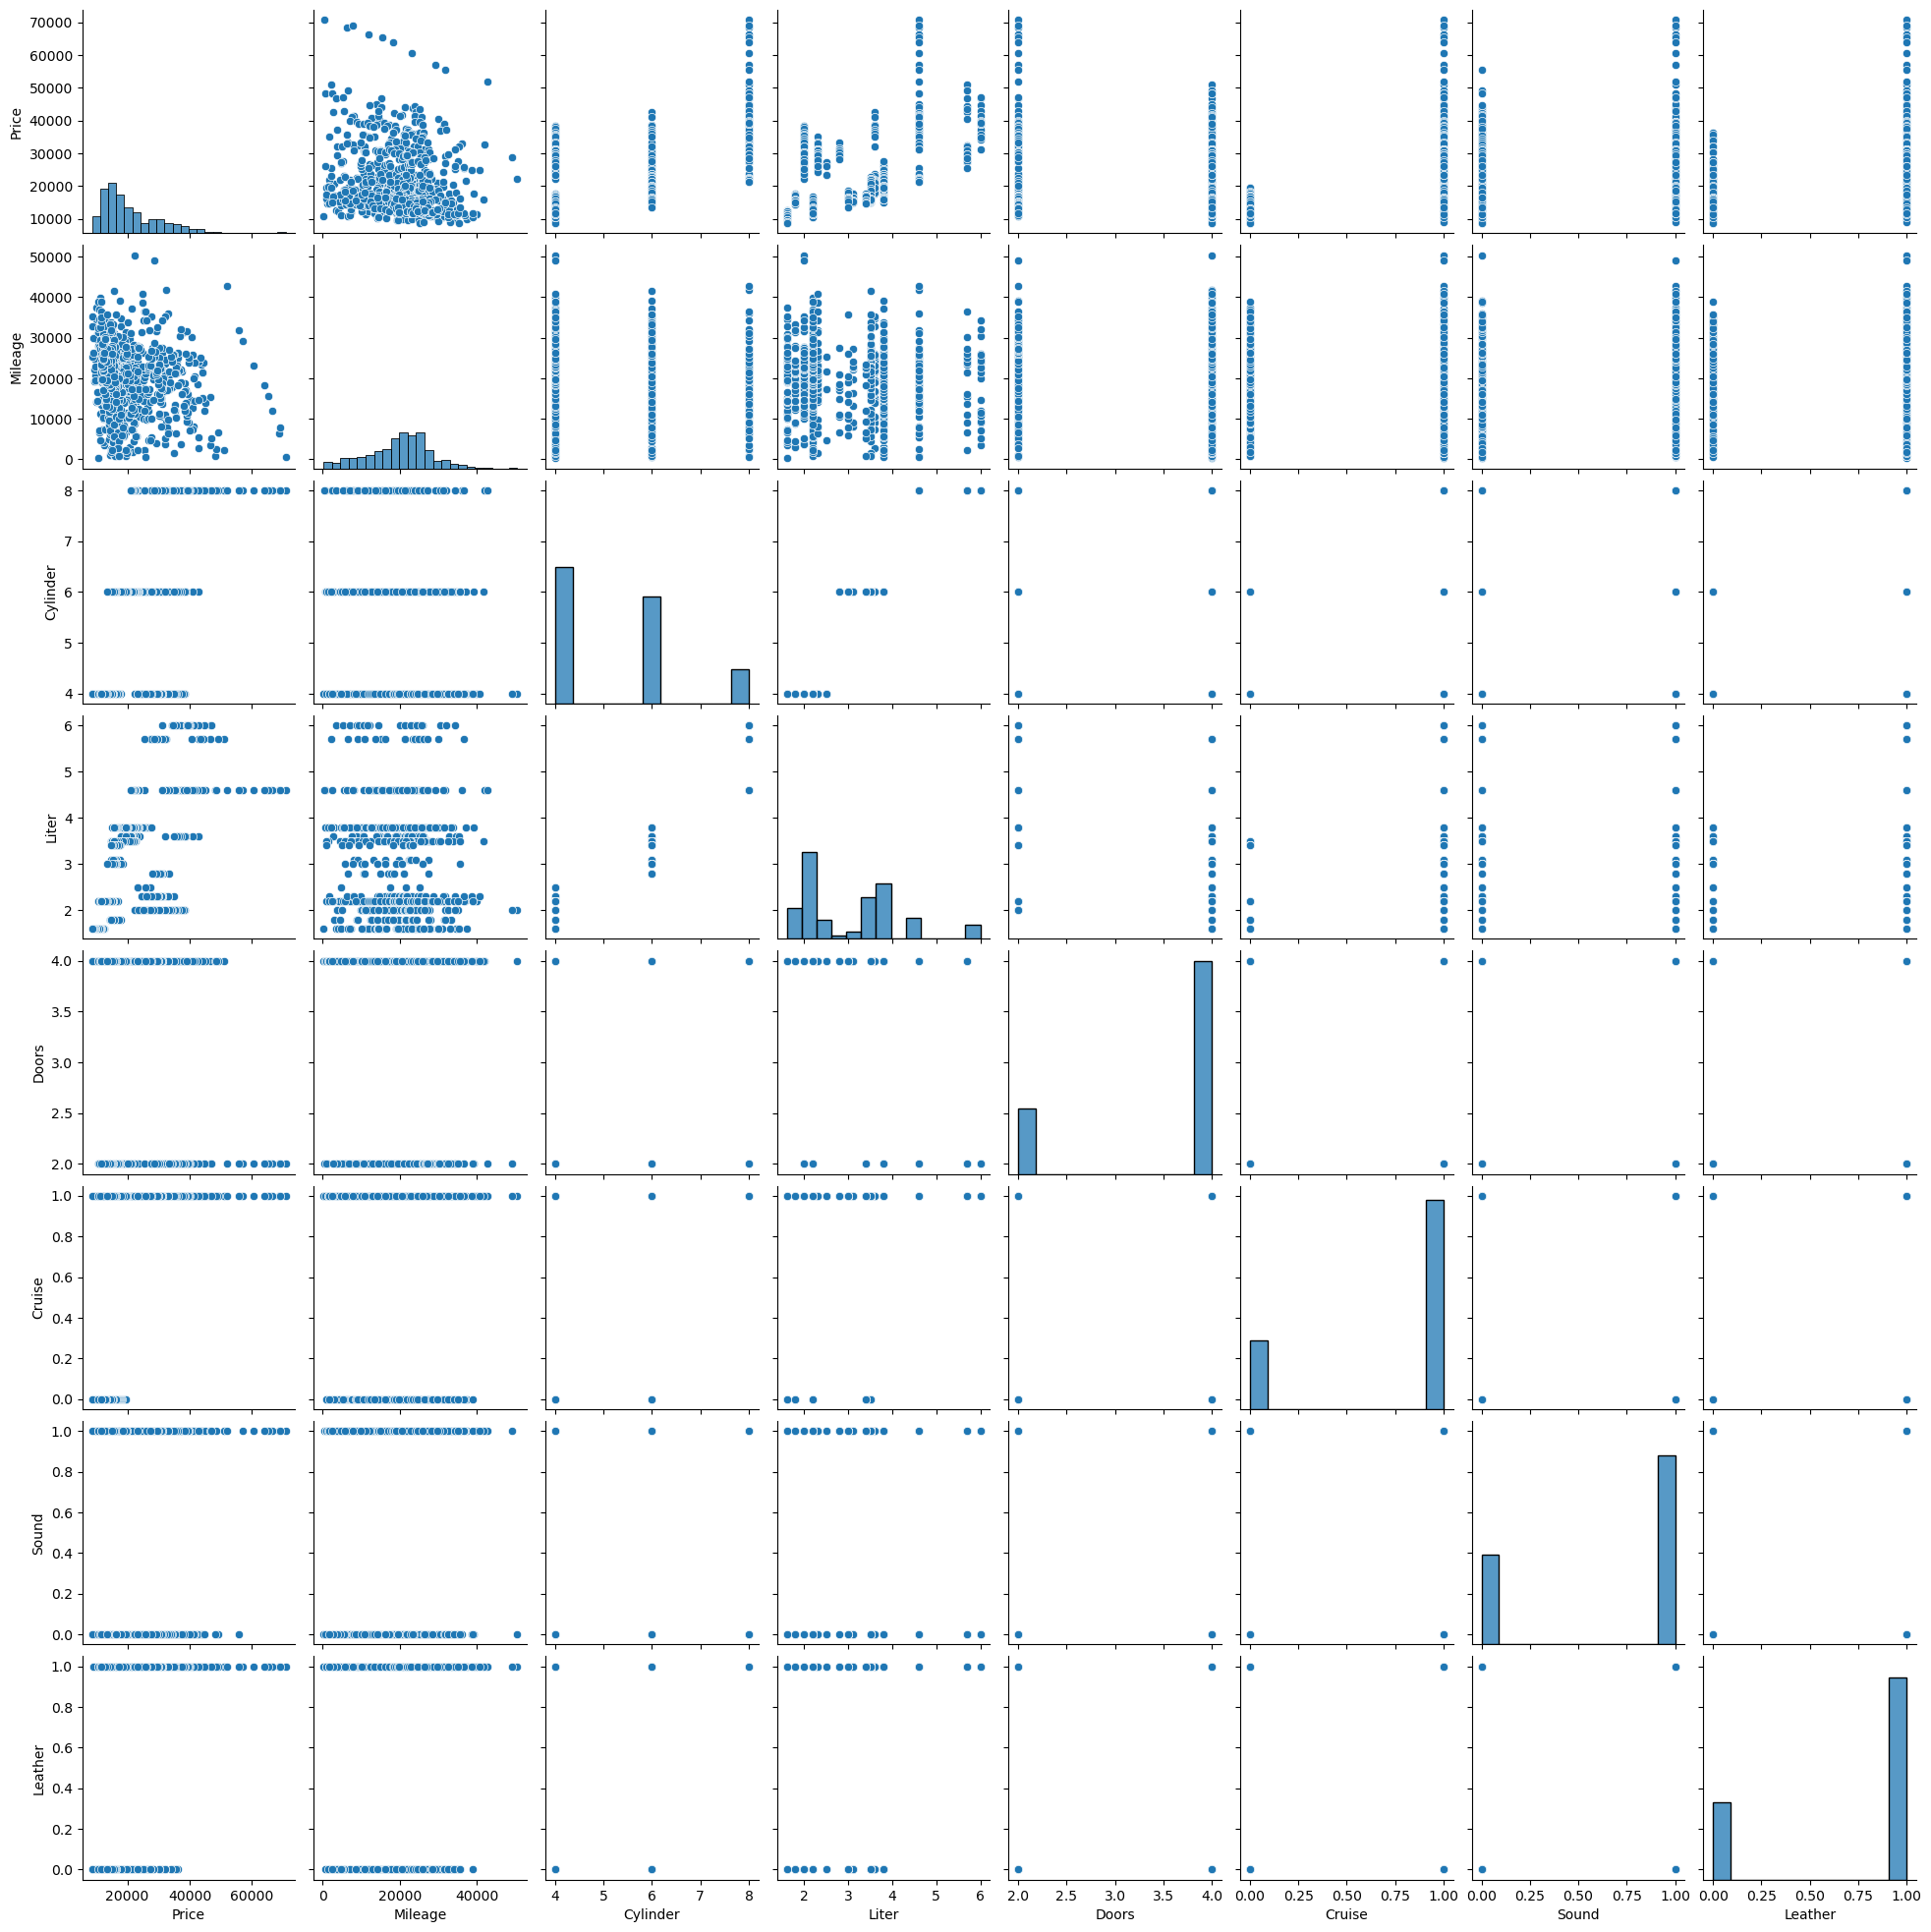

In [18]:
sns.pairplot(df)
#linear olup olmadığını anlamak için pairplot yaptım.
#pairplot : bütün sütunların bütün sütunlara göre değişimin gösterir
#arabanın fiyatı ile arabanın üzerindeki kilometrenin bağlantısı linear mi değil mi ona bakıyorum
#linear ise düzgü bir çizgi üzerinde olur bağlantısı 

## Modelling

In [19]:
# Korelasyon .90 dan büyükse muhtemelen veri baska bir formda kendisini tekrar etmiştir
# Korelasyon .20 den küçükse ilişkiye katkısı çok az olduğu anlamına gelir. hesaba katmayız

In [20]:
x=df[["Mileage","Cylinder","Liter","Cruise"]]
#korelasyonu %20 ile %90 arası olan sütunları alıyoruz

In [21]:
x.head()

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1


In [22]:
y=df[["Price"]] #hedefi tanımladım

In [23]:
y.shape

(804, 1)

In [24]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [25]:
#arabaların mileage dağılımını görmek için
#df["Mileage"].hist()

In [26]:
#fiyat dağılımı için
#df["Price"].hist()

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression 
#sklearn: science kit Learn,es. kay Learn
#bilim kiti yani
from sklearn.model_selection import train_test_split
#train_test_split : Başarı oranımı bulmak için

### BAŞARI ORANIM İÇİN

In [28]:
#başarı oranını test etmek için veriyi ikiye böleceğim
#veriyi eğiteceğim. sonra test edeceğim
#test_size %20 kenara koyduk, teste ayırdım
#train_size 0.80 eğitiyoruz, eğitime ayırdık
#random_state :(seed) tohum demeke.bilgisayarlar random sayılarını saatler oluşturuyor,
#o an bulunduğumuz saate göre bir rakam oluşturuyor,
#fakat her seferinde aynı sayıyı üretmesini istiyorum 
#state = yapıp bir sayı veririm ki hep aynı random numaraları üret bu proje boyunca 13 öylesine seçtim farklı sayıda olabilirdi
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=13)
# x_train,y_train : modeli eğitiyoruz
#xtestile tahmin ediyoruz, ytest ile karşılaştırıyoruz modeli


In [29]:
#boyutuna bakıyorum
#0.80 ve 0.20 oranında ayırmış mı kontrol ediyorum
#643 tanesini eğitmek için
#161 tanesini test etmek için bırakmış
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((643, 4), (161, 4), (643, 1), (161, 1))

In [30]:
643/804

0.7997512437810945

In [31]:
161/804

0.20024875621890548

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=13)

lr=LinearRegression() 
regmodel=lr.fit(x_train,y_train)

y_pretest=regmodel.predict(x_test)
y_pretest

array([[11088.59519508],
       [25841.94958311],
       [18016.59610564],
       [11396.31242264],
       [23438.58107505],
       [31465.13970689],
       [19144.30395452],
       [24696.84347   ],
       [28814.17781722],
       [11125.87161741],
       [24377.21676116],
       [21013.19459523],
       [18158.0896495 ],
       [26914.7978032 ],
       [24173.01035937],
       [20745.46079635],
       [11330.89194026],
       [24762.56477964],
       [24532.89716461],
       [30168.61854422],
       [20610.64766332],
       [18811.24456355],
       [18443.3293379 ],
       [29979.93067446],
       [25128.12531005],
       [23738.95140032],
       [12079.5854011 ],
       [18168.65770738],
       [24674.85170032],
       [14014.98649486],
       [12845.7750005 ],
       [23926.82534903],
       [19330.46976016],
       [24433.51568768],
       [25457.27227633],
       [15566.18524491],
       [34318.32318755],
       [26233.45808331],
       [29494.95289109],
       [11104.73550166],


In [33]:
#modeli tanımladım,lr.fit dediğimde makine öğreniyor

lr=LinearRegression() 
regmodel=lr.fit(x_train,y_train)

In [34]:
 #predict dediğim de yeni verieri tahminliyor
y_pretest=regmodel.predict(x_test)
y_pretest

array([[11088.59519508],
       [25841.94958311],
       [18016.59610564],
       [11396.31242264],
       [23438.58107505],
       [31465.13970689],
       [19144.30395452],
       [24696.84347   ],
       [28814.17781722],
       [11125.87161741],
       [24377.21676116],
       [21013.19459523],
       [18158.0896495 ],
       [26914.7978032 ],
       [24173.01035937],
       [20745.46079635],
       [11330.89194026],
       [24762.56477964],
       [24532.89716461],
       [30168.61854422],
       [20610.64766332],
       [18811.24456355],
       [18443.3293379 ],
       [29979.93067446],
       [25128.12531005],
       [23738.95140032],
       [12079.5854011 ],
       [18168.65770738],
       [24674.85170032],
       [14014.98649486],
       [12845.7750005 ],
       [23926.82534903],
       [19330.46976016],
       [24433.51568768],
       [25457.27227633],
       [15566.18524491],
       [34318.32318755],
       [26233.45808331],
       [29494.95289109],
       [11104.73550166],


In [35]:
#başarımı ölçmek için
#hata oranım ile r2 scorrema bakıyorum
#r2 %80 üzeri ise başarılıyım
from sklearn.metrics import mean_squared_error, r2_score
#hatamızı : mean_squared_error ile ölçeriz
#başarımızı : r2_score ölçeriz

In [36]:
#r2 ne kadar 1 e yakınsa başarı oranı o kadar güzel olacak
(mean_squared_error(y_test, y_pretest)) ** 0.5
#gerçek değerlerimizle tahmin ettiğimiz değerleri karşılaştırıyoruz ve onunda karekökünü alıyoruz

7618.572507410892

In [37]:
r2_score(y_test, y_pretest)

0.44354475423959283

In [38]:
#sonucumuz iyi çıksın diye yazılı sütunlarıda aldık, onları numeric'e çevireceğiz
x=df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]]

In [39]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [40]:
#SPARSE MATRIX
#sparse matrix oluştu, hepsi için yeni sütun oluştu, içerisinde yazı olan sütunların hepsini 0-1 e çeviriyor
x=pd.get_dummies(x,drop_first=True)
#dummies uyguluyorum, her bir marka için sütun oluşturuyor ve sütun sayımız 55 çıkıyor
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#modelimizi yeniden tanımlayacağız
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=13)

lr=LinearRegression() 
regmodel=lr.fit(x_train,y_train)

y_pretest=regmodel.predict(x_test)
y_pretest

array([[12598.2920699 ],
       [20910.1504077 ],
       [16284.23720867],
       [11119.83213478],
       [17775.57209261],
       [30779.12880603],
       [17879.17308903],
       [30471.84518438],
       [62259.5452672 ],
       [11547.99027102],
       [17532.97925807],
       [14421.95947463],
       [12687.08301809],
       [22994.1808852 ],
       [17783.47184065],
       [19408.87684133],
       [13336.89617232],
       [35337.86682389],
       [17013.57763966],
       [37651.52782558],
       [13843.31249302],
       [30186.70701063],
       [27761.42782217],
       [63373.27533623],
       [20228.18119616],
       [16261.32566591],
       [ 9477.80239708],
       [11510.29857391],
       [18534.021751  ],
       [13891.67907375],
       [12735.44912618],
       [22322.79628175],
       [33231.0275061 ],
       [18342.65116507],
       [20634.08372835],
       [15264.78092984],
       [33504.98636248],
       [59793.99251344],
       [36870.45285288],
       [11002.42746474],


In [42]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

1715.1549742445357

In [43]:
r2_score(y_test, y_pretest)

0.9717973599236389

In [44]:
#yukarıdaki başarı oranını yeterli bulmadık, gerçekten doğru mu diye farklı yollardan yine bakacağım aynı başarı oranı var mı diye
#Ridge hataların karesini alır
#Lasso hataların mutlak değerini alıyor, hatayı azaltmaya çalışıyor
#amaçları hatayı 0'a çekmek
from sklearn.linear_model import Ridge, Lasso

In [45]:
R=Ridge()
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [46]:
y_pred_ridge

array([[12547.06096795],
       [21083.62667108],
       [16646.51463203],
       [11099.62475576],
       [17810.15831786],
       [30377.36935397],
       [18260.40074386],
       [30839.88710425],
       [59018.32787218],
       [11545.92688012],
       [18597.35756302],
       [14499.47323352],
       [12506.84981056],
       [23241.34717614],
       [17922.54994885],
       [19781.34473191],
       [13450.33836268],
       [35007.77699073],
       [17510.30621881],
       [38169.13024838],
       [13562.73097944],
       [30050.76366604],
       [27886.46066696],
       [60125.68022733],
       [20405.56271865],
       [16555.93317047],
       [ 9823.54724733],
       [11243.07693598],
       [18738.37009621],
       [14036.9270011 ],
       [12867.10149153],
       [22057.52145177],
       [32724.34259025],
       [18568.31203248],
       [20781.66033397],
       [15656.50760348],
       [33087.61743731],
       [56566.89397041],
       [37184.66889582],
       [11418.56227066],


In [47]:
(mean_squared_error(y_test, y_pred_ridge)) ** 0.5

1830.2364265268072

In [48]:
r2_score(y_test, y_pred_ridge)

0.9678857769105055

In [49]:
#ElasticNet

from sklearn.linear_model import ElasticNet
E=ElasticNet(l1_ratio= .8)

#elastic : ric ve lassonun en güzel taraflarını alır ve ikisini beraber kullanlarak farklı bir model oluşturuyor
#l1 dediği lasso l2 dediği ric


In [50]:
E.fit(x_train, y_train)
y_pred_elastic=E.predict(x_test)

In [51]:
(mean_squared_error(y_test, y_pred_elastic)) ** 0.5

5438.645223343262

In [52]:
r2_score(y_test, y_pred_elastic)

0.7164272533220173

#### Veri eğer Linear değilse karar ağaçlarına bakıcaz

In [53]:
# EXTRA TREE REGRESSOR

from sklearn.tree import ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr=ETR.predict(x_test)


In [54]:
(mean_squared_error(y_test,y_pred_etr))**0.5

1542.372711160024

In [55]:
r2_score(y_test, y_pred_etr)

0.9771933395849631

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [57]:
y_pred_gbr=GBR.predict(x_test)

In [58]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

1513.3801100213145

In [59]:
r2_score(y_test,y_pred_gbr)

0.978042692991179

In [60]:
#K-NEIGHBORS
from sklearn.neighbors import KNeighborsRegressor
est=KNeighborsRegressor(n_neighbors=10,weights="uniform")
model=est.fit(x_train,y_train)
#medli

In [61]:
y_pred_knb=model.predict(x_test)

In [62]:
(mean_squared_error(y_test,y_pred_knb))**0.5

10957.554475298126

In [63]:
r2_score(y_test,y_pred_knb)

-0.1510927203863841

In [64]:
#modeli geliştirip web sitesine koyucaz
#model=isim veriyoruz
#model.save('arabatahmin.h') kaydediyor modeli
#model.load() modeli yükler